1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
Predicted class: 01-minor
Prediction probabilities: [0.7764699  0.20051941 0.02301073]


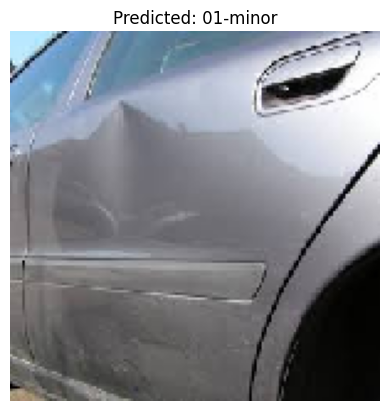

In [6]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

# Load the trained model
model = tf.keras.models.load_model("car_damage_severity_model.h5")

# Define class labels
class_labels = ['01-minor', '02-moderate', '03-severe']

def prepare_image(image_path):
    """Load and preprocess the image."""
    img = load_img(image_path, target_size=(150, 150))  # Use the same target size as during training
    img_array = img_to_array(img) / 255.0  # Normalize the image
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

def predict_damage_severity(image_path):
    """Predict the damage severity of a car image."""
    # Prepare the image
    img = prepare_image(image_path)
    
    # Make prediction
    predictions = model.predict(img)
    predicted_class = np.argmax(predictions, axis=1)  # Get the index of the highest score
    return class_labels[predicted_class[0]], predictions[0]

# Test with a sample image
test_image_path = "C:\\Users\\prana\\Documents\\car_damage\\damage_severity\\training\\01-minor\\0001.JPEG"
predicted_class, prediction_probs = predict_damage_severity(test_image_path)

# Display results
print(f"Predicted class: {predicted_class}")
print(f"Prediction probabilities: {prediction_probs}")

# Display the test image
img = load_img(test_image_path, target_size=(150, 150))
plt.imshow(img)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()
